# PROYECTO ML - ALZHEIMERS

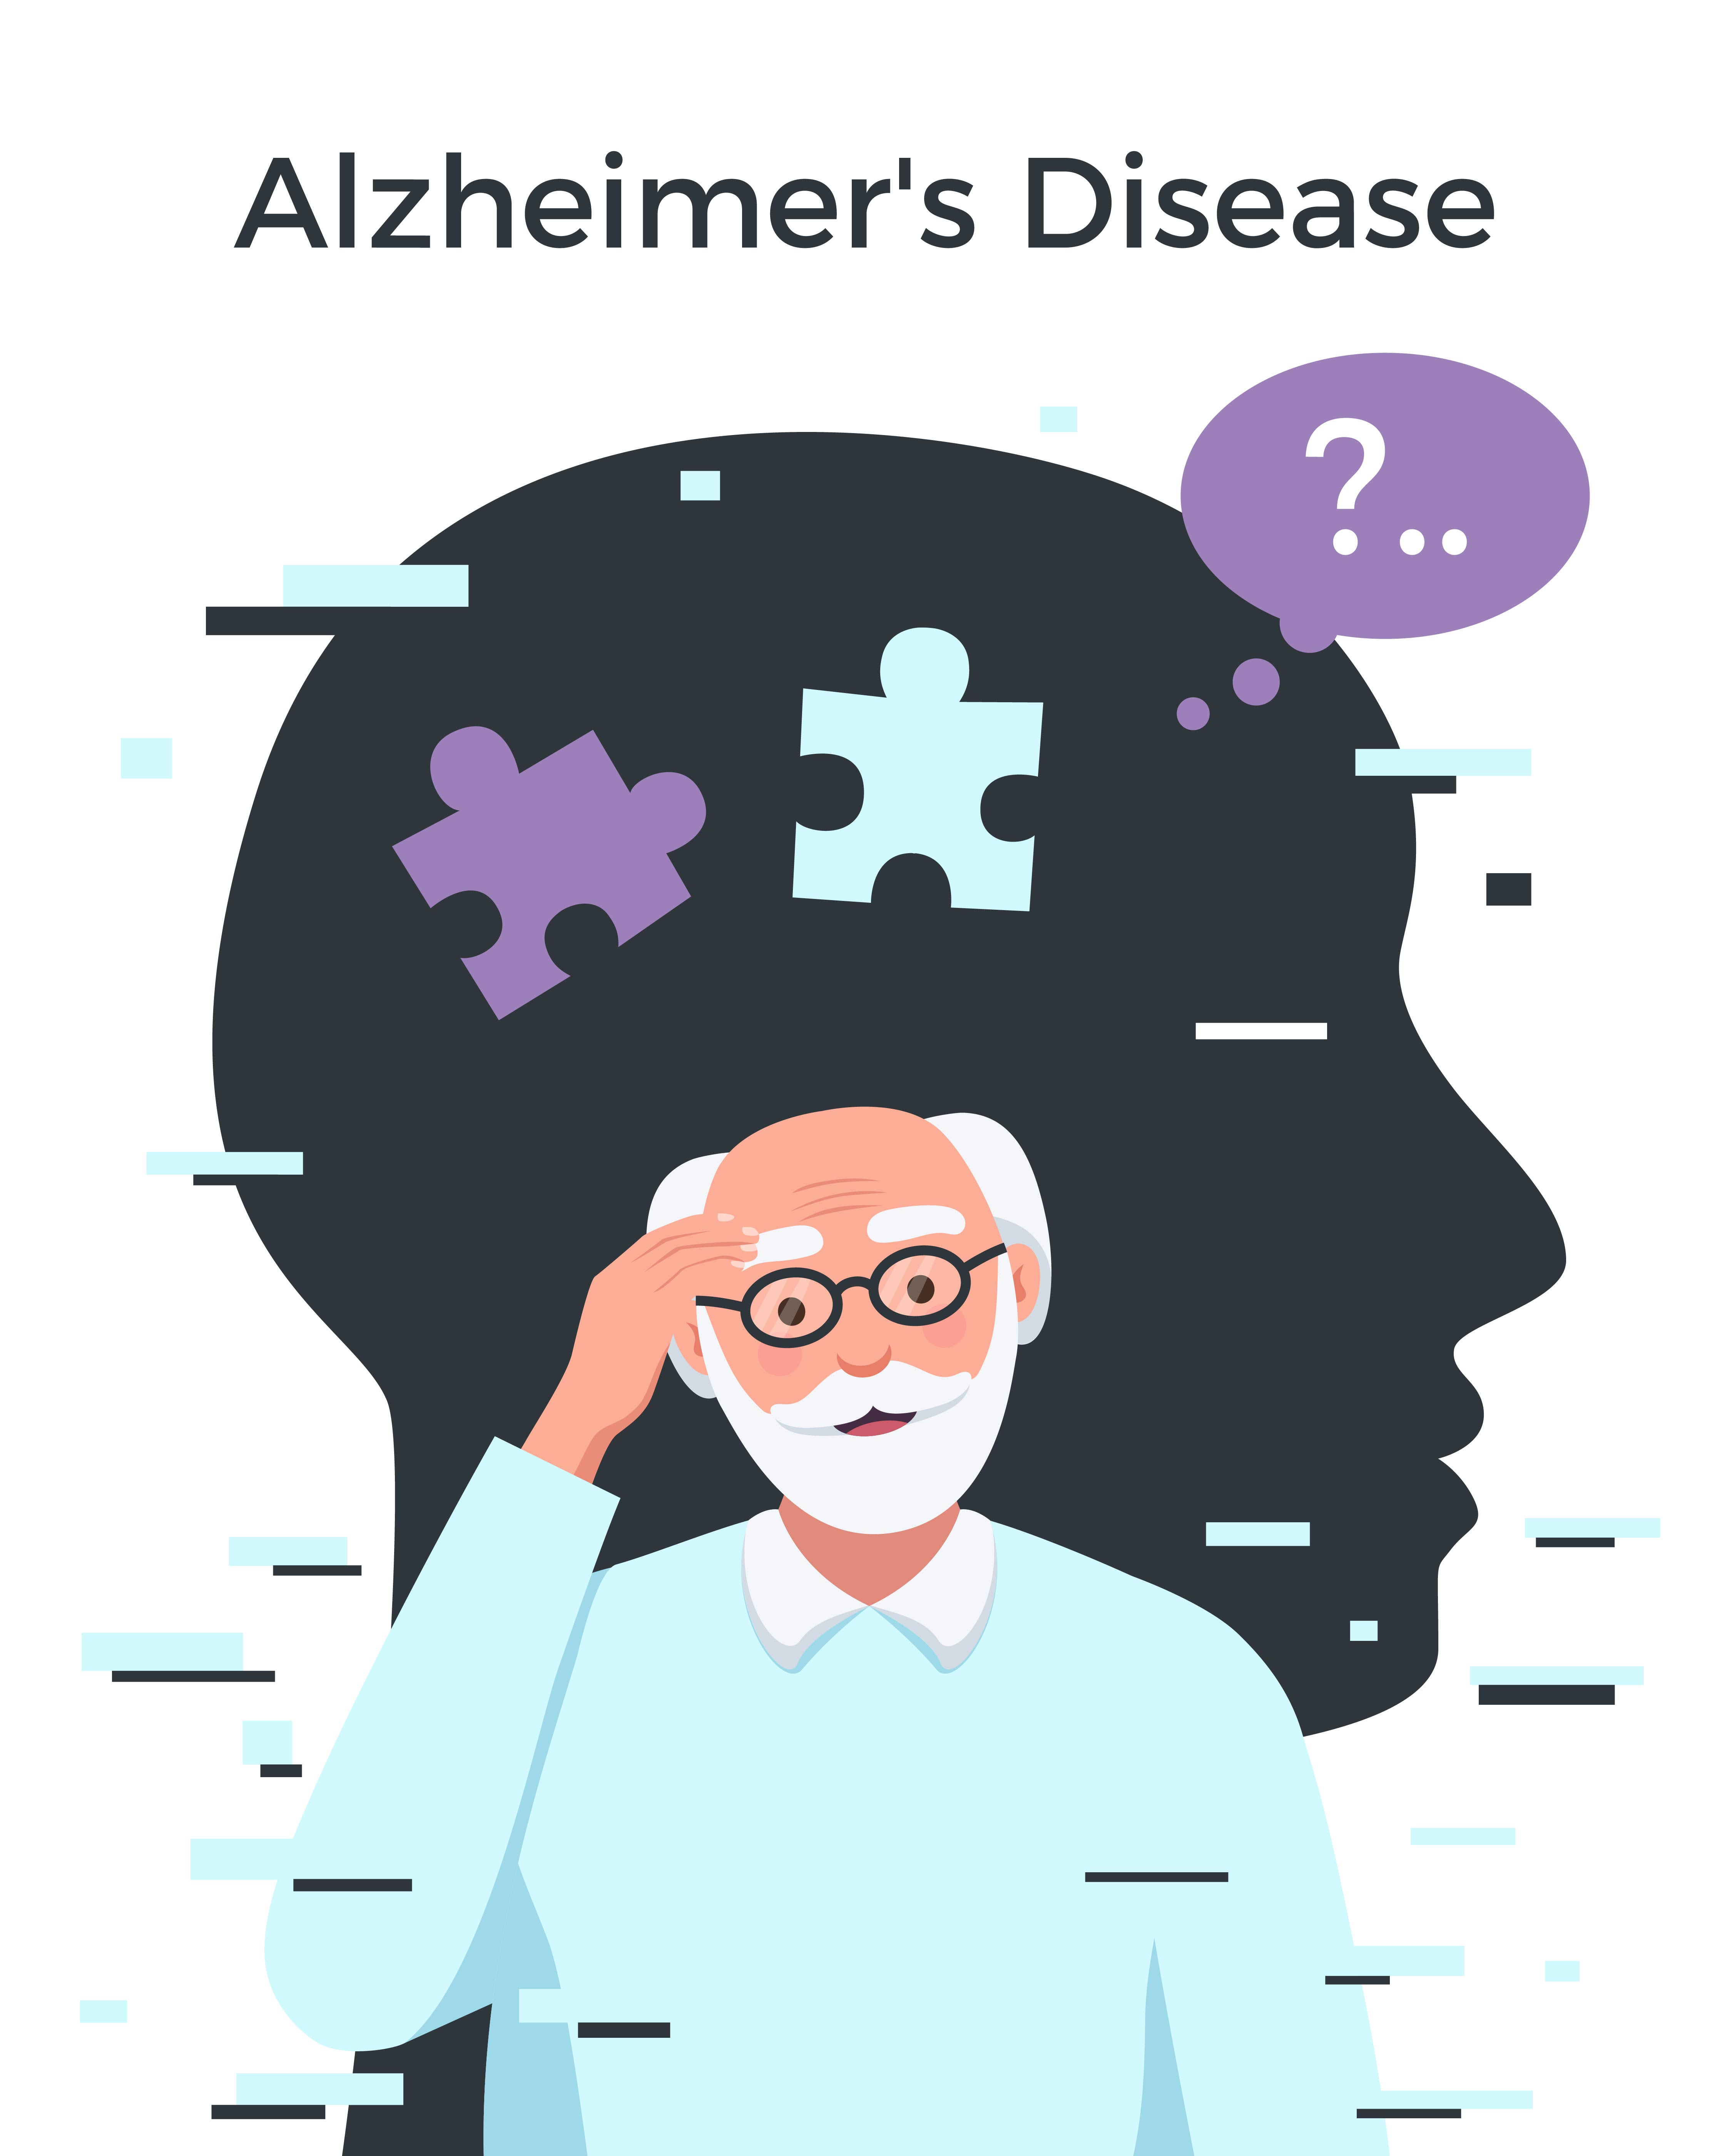

El objetivo de este proyecto es crear un modelo predictivo para comprobar la probabilidad que tiene una persona de padecer la enfermedad.

# Índice

1. Introducción  
2. Descripción del conjunto de datos  
3. Análisis exploratorio inicial  
4. Limpieza y preprocesamiento de datos  
5. Preparación de los datos para modelado  
6. Entrenamiento y evaluación de modelos supervisados  
   6.1. Logistic Regression  
   6.2. Decision Tree  
   6.3. Support Vector Classifier (SVC)  
   6.4. AdaBoost  
   6.5. Gradient Boosting  
   6.6. Random Forest  
7. Modelos con preprocesamiento no supervisado  
   7.1. K-Means como técnica de reducción / transformación  
   7.2. Random Forest + K-Means  
   7.3. Logistic Regression + K-Means  
   7.4. Análisis de resultados
8. Modelo de Red Neuronal  
   8.1. Escalado de datos  
   8.2. Arquitectura del modelo  
   8.3. Entrenamiento  
   8.4. Evaluación y resultados
9. Comparación de modelos  
10. Selección del modelo final  
11. Conclusiones finales  

# Variables de las que disponemos para realizar el modelo predictivo:

PatientID: Identificador numérico único para cada paciente, con valores entre 4751 y 6900.

Age: Edad del paciente en años, entre 60 y 90.

Gender: Género, codificado como 0 para Hombre y 1 para Mujer.

Ethnicity: Etnicidad, codificada como 0 Caucásico, 1 Afroamericano, 2 Asiático y 3 Otro.

EducationLevel: Nivel educativo, codificado como 0 Ninguno, 1 Secundaria, 2 Grado universitario y 3 Educación superior.

BMI: Índice de Masa Corporal, con valores entre 15 y 40.

Smoking: Tabaquismo, donde 0 indica No y 1 indica Sí.

AlcoholConsumption: Consumo semanal de alcohol, en unidades, entre 0 y 20.

PhysicalActivity: Actividad física semanal en horas, de 0 a 10.

DietQuality: Puntuación de calidad de la dieta, de 0 a 10.

SleepQuality: Puntuación de calidad del sueño, de 4 a 10.

FamilyHistoryAlzheimers: Antecedentes familiares de Alzheimer, con 0 para No y 1 para Sí.

CardiovascularDisease: Presencia de enfermedad cardiovascular, 0 No y 1 Sí.

Diabetes: Presencia de diabetes, 0 No y 1 Sí.

Depression: Presencia de depresión, 0 No y 1 Sí.

HeadInjury: Antecedente de lesión craneal, 0 No y 1 Sí.

Hypertension: Presencia de hipertensión, 0 No y 1 Sí.

SystolicBP: Presión arterial sistólica, entre 90 y 180 mmHg.

DiastolicBP: Presión arterial diastólica, entre 60 y 120 mmHg.

CholesterolTotal: Colesterol total, entre 150 y 300 mg/dL.

CholesterolLDL: Colesterol LDL (lipoproteínas de baja densidad), entre 50 y 200 mg/dL.

CholesterolHDL: Colesterol HDL (lipoproteínas de alta densidad), entre 20 y 100 mg/dL.

CholesterolTriglycerides: Triglicéridos, entre 50 y 400 mg/dL.

MMSE: Puntuación del Mini-Mental State Examination (0 a 30), donde puntuaciones bajas indican deterioro cognitivo.

FunctionalAssessment: Puntuación de evaluación funcional, de 0 a 10, donde valores bajos indican mayor deterioro.

MemoryComplaints: Presencia de quejas de memoria, 0 No y 1 Sí.

BehavioralProblems: Presencia de problemas de conducta, 0 No y 1 Sí.

ADL: Actividades de la vida diaria, puntuación de 0 a 10; valores bajos indican mayor dificultad.

Confusion: Presencia de confusión, 0 No y 1 Sí.

Disorientation: Presencia de desorientación, 0 No y 1 Sí.

PersonalityChanges: Cambios de personalidad, 0 No y 1 Sí.

DifficultyCompletingTasks: Dificultad para completar tareas, 0 No y 1 Sí.

Forgetfulness: Presencia de olvidos, 0 No y 1 Sí.

Diagnosis: Diagnóstico de Alzheimer, con 0 No y 1 Sí.

DoctorInCharge: Columna confidencial con el valor constante "XXXConfid".

# Fuente de los datos

Dataset sacado de opendatabay.com, para calcular las probabilidades de padecer Alzheimer en base a una serie de parámetros

Importamos pandas, leemos nuestro archivo .csv y visualizamos los cinco primeros registros

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


Vemos la información sobre los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

# Limpieza de datos

Se importan las librerías necesarias para el siguiente paso del proyecto, en este caso, la limpieza.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Una vez observados nuestros datos pasamos a la limpieza de los mismos, para poder quedarnos con lo necesario para el posterior entrenamiento del modelo

In [5]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Quitamos las 2 columnas que sabemos seguro que no vamos a usar.

In [6]:
df = df.drop(["DoctorInCharge", "PatientID"], axis=1)

Miramos la distribución que tiene el target, en este caso, la columna Diagnosis

In [7]:
df["Diagnosis"].value_counts(normalize=True)

Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64

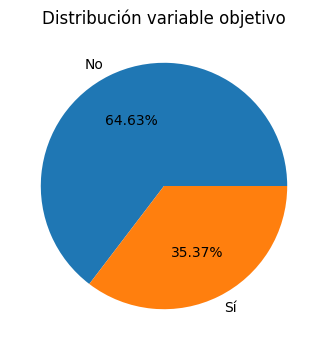

In [8]:
plt.figure(figsize=(5,4))
plt.pie(x=df["Diagnosis"].value_counts(), labels=("No", "Sí"), autopct='%1.2f%%')
plt.title("Distribución variable objetivo");

Pasamos a hacer una comprobación de correlaciones con nuestro objetivo ("Diagnosis").

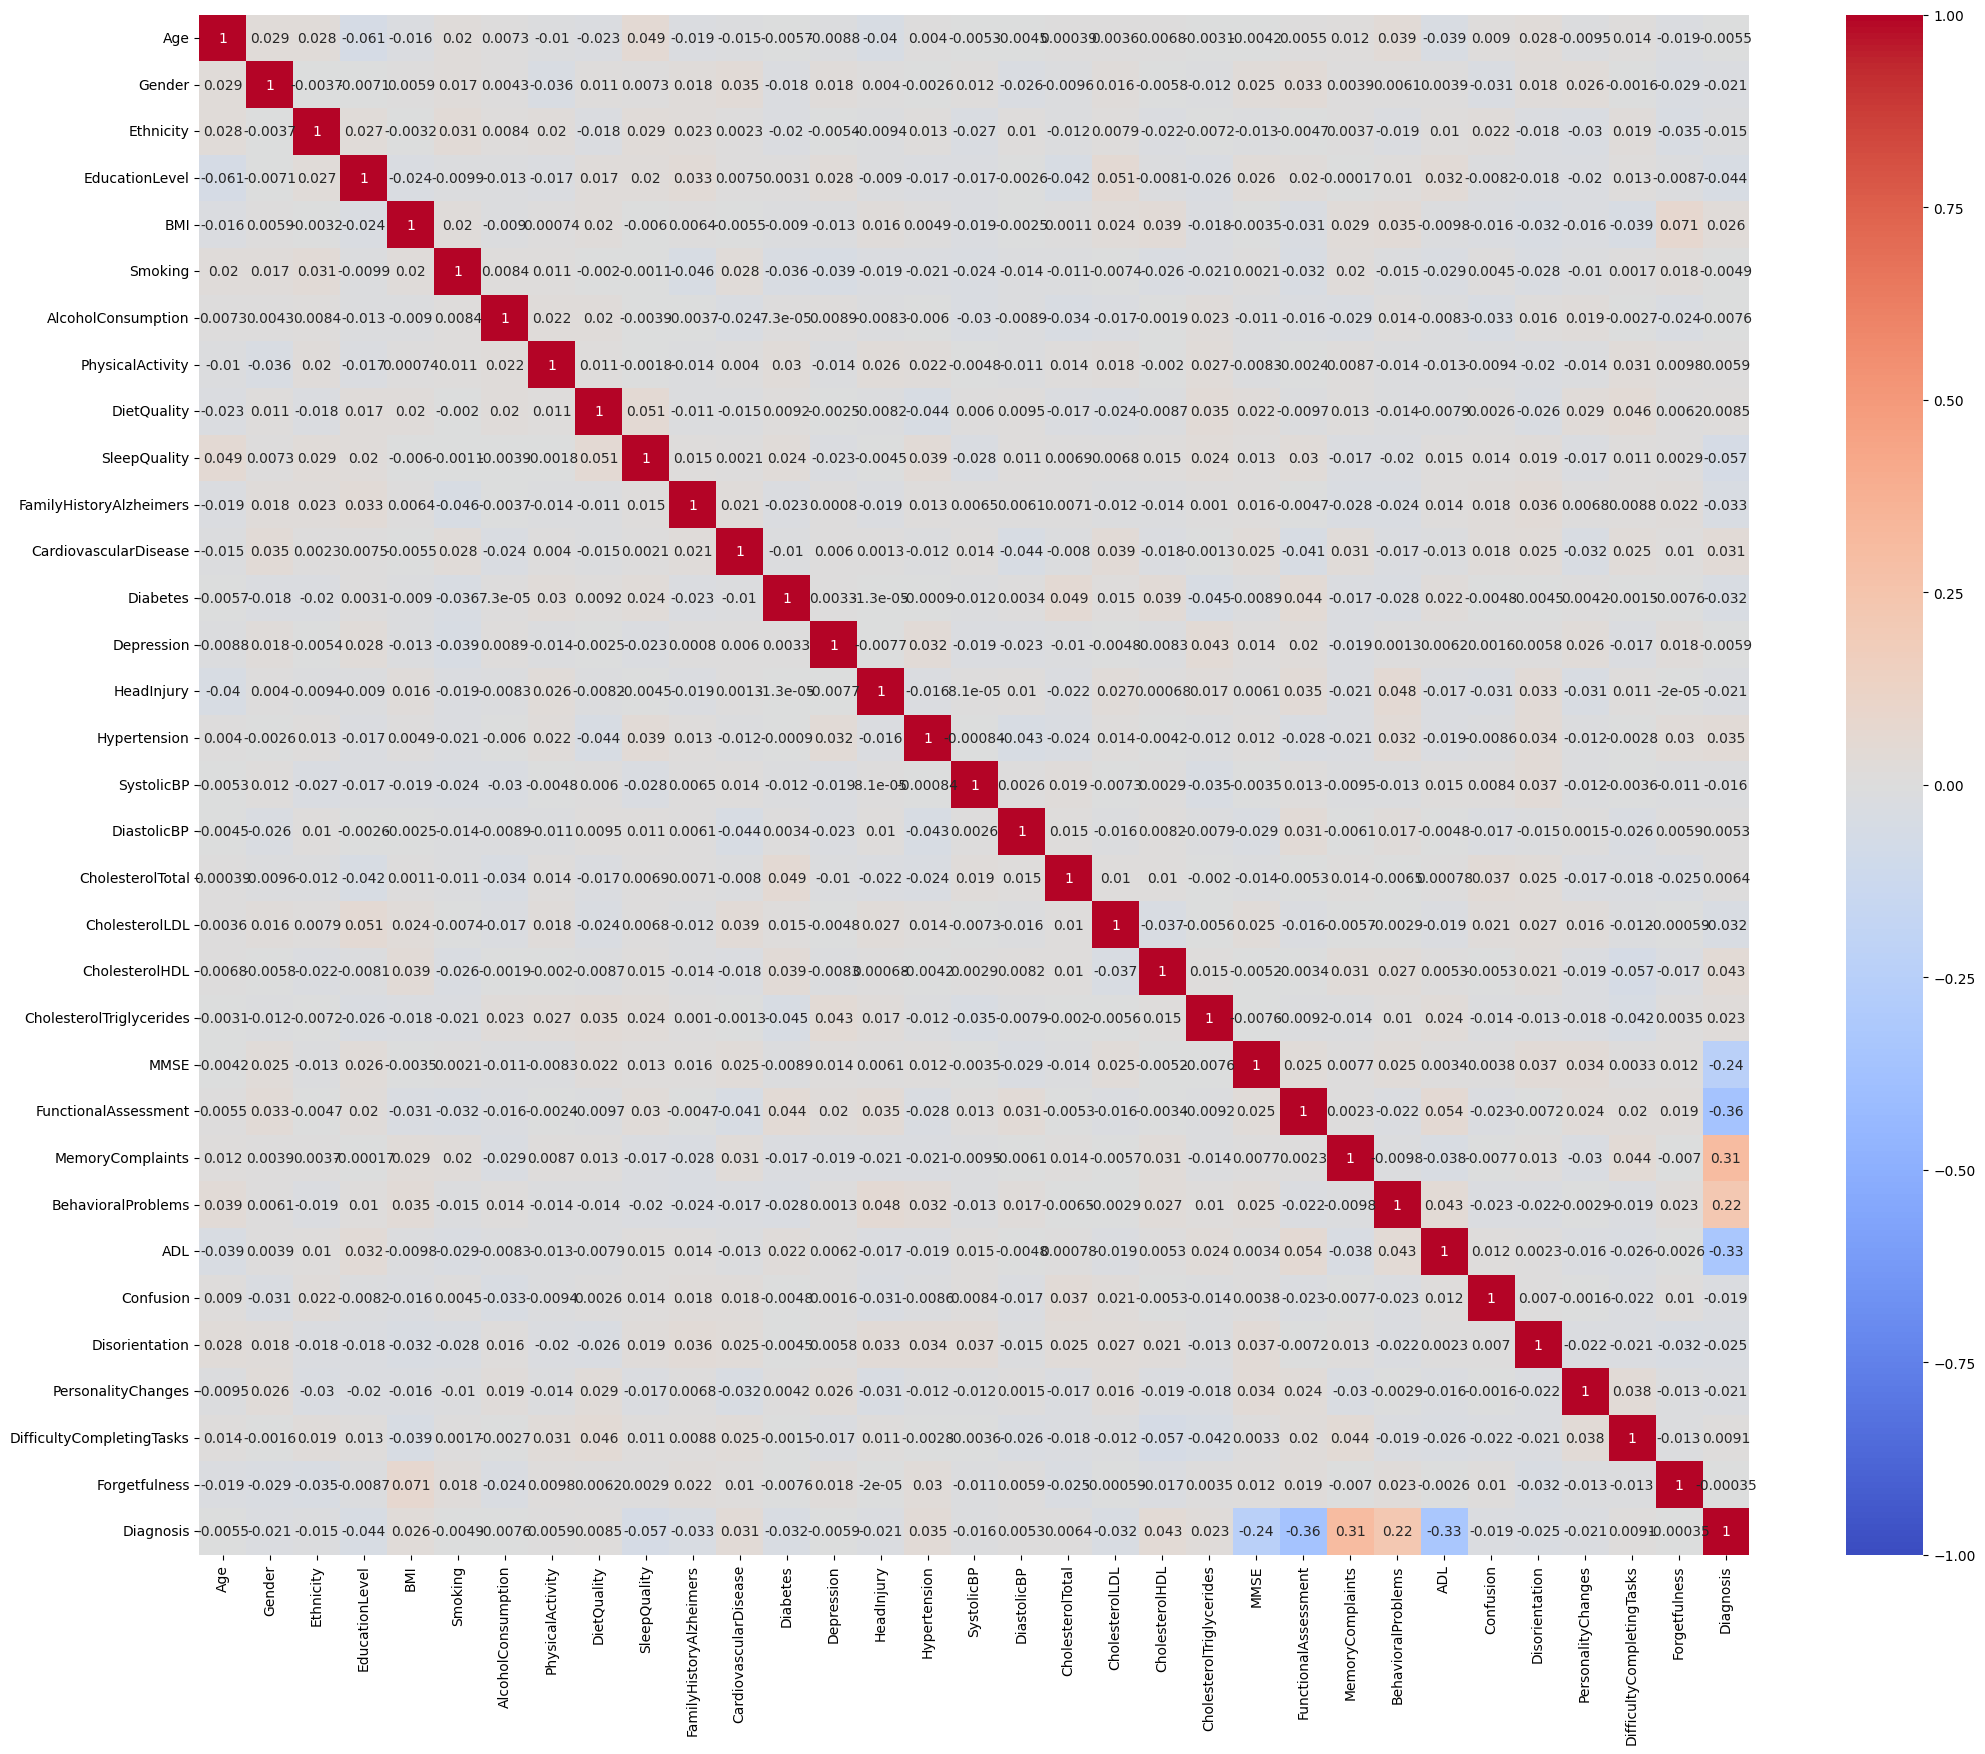

In [9]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, vmin=-1, cmap="coolwarm");

Vemos unas correlaciones bastante bajas en la mayoría de las columnas, para una primera prueba quitamos todas las que tienen dos "0" de decimal.

Quitamos todas las columnas que no consideramos útiles para el modelo

In [10]:
df = df.drop(
            ["CholesterolTotal", "Age", "Smoking", 
             "AlcoholConsumption", "PhysicalActivity", "DietQuality", "Depression", 
             "DiastolicBP", "DifficultyCompletingTasks", "Forgetfulness"], 
             axis=1
             )

Volvemos a visualizar la correlación que tienen las diferentes variables con la columna objetivo.

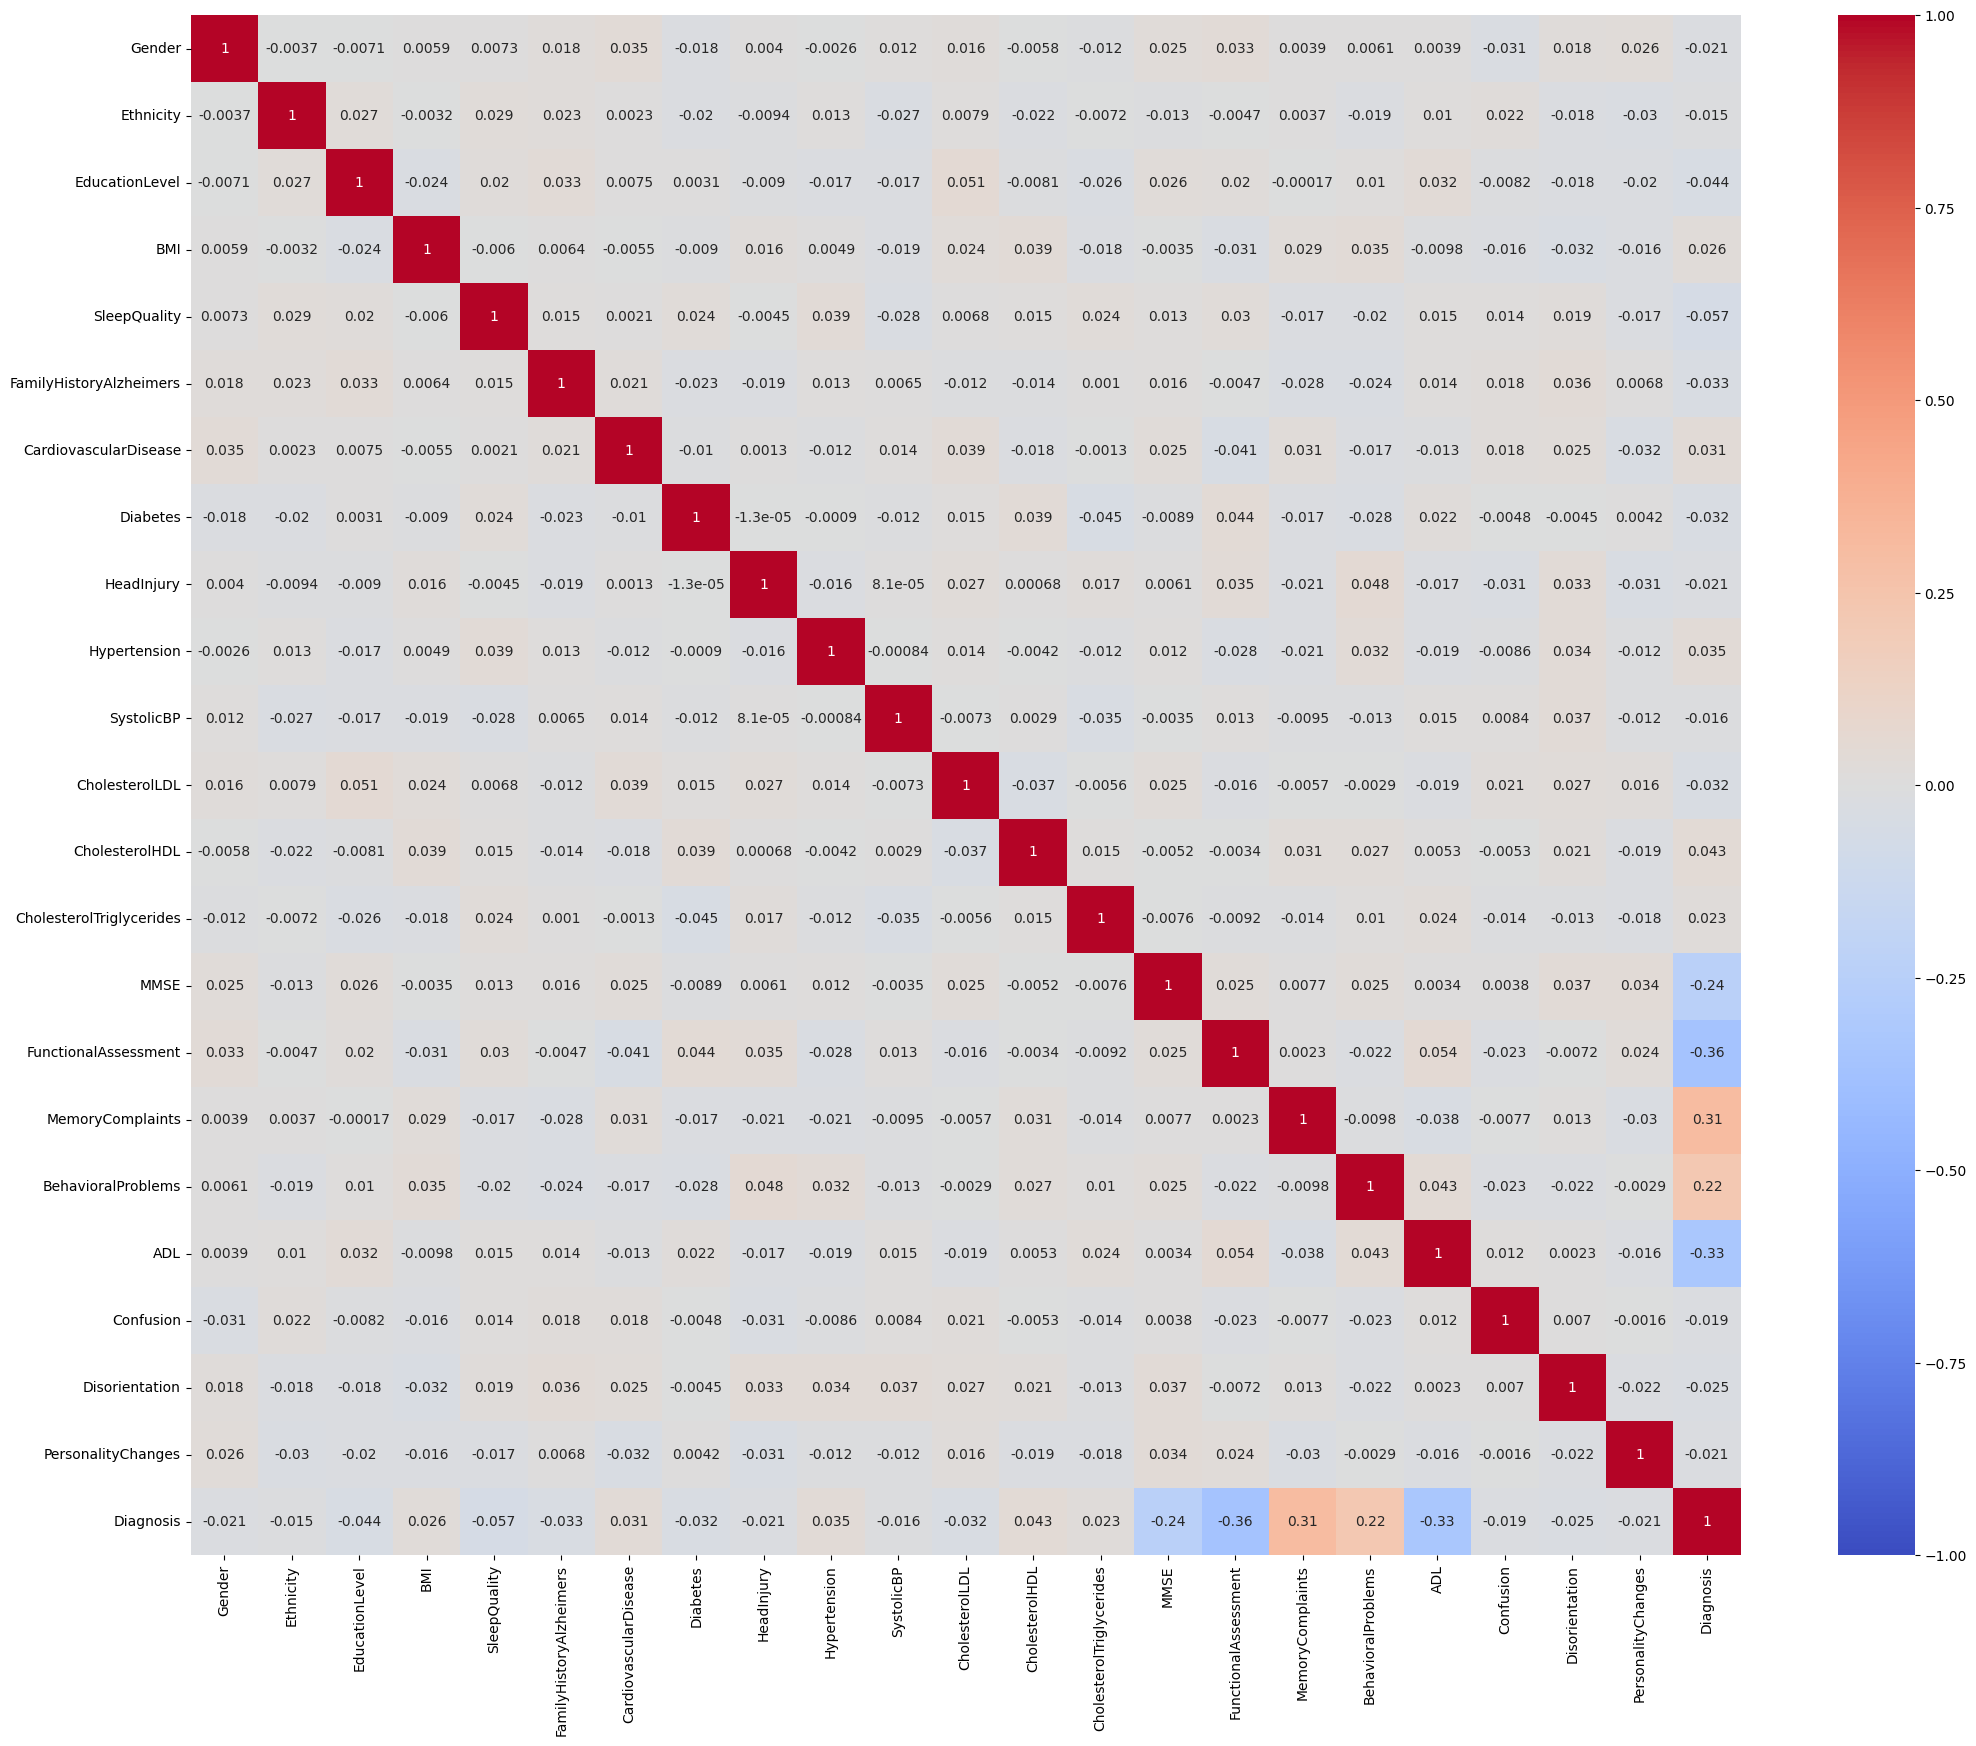

In [11]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, vmin=-1, cmap="coolwarm");

Vemos, que las que más correlación tienen son:

    MMSE: Mini-Mental State Examination.
    FunctionalAssessment: Evaluación funcional.
    MemoryComplaints: Presencia de quejas de memoria.
    BehavioralProblems: Presencia de problemas de conducta.
    ADL: Actividades de la vida diaria.

Se hace una prueba rápida con un modelo sencillo para evaluar los resultados sin tratar más los datos.  
Después de escalar los datos, sacar un lipid_index, escalando las columnas de colesterol y sacando una media para ver si mejoraban las métricas, vemos que no influyen en los resultados.  
Con feature_importance_ miramos que variables están tomando en cuenta los modelos realmente y vemos que las que más peso tienen y las únicas que tienen peso en algunos modelos, son las 5 con mayor correlación.  
Es por ello que se decide eliminar todas menos esas para evaluar diferentes modelos y elegir el que mejor métricas nos de.

In [12]:
# Quitamos el resto de columnas que los modelos no están teniendo en cuenta a la hora de entrenarse

df = df.drop(columns=['Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'HeadInjury', 'Hypertension', 'SystolicBP', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'Confusion', 'Disorientation', 'PersonalityChanges'])

In [13]:
df.describe()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,14.755132,5.080055,0.208004,0.156817,4.982958,0.353653
std,8.613151,2.892743,0.405974,0.363713,2.949775,0.478214
min,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000
25%,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000
50%,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000
75%,22.161028,7.546981,0.000000,0.000000,7.581490,1.000000
max,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000


Un último mapa de calor para ver las correlaciones que nos han quedado de una manera más limpia y clara.

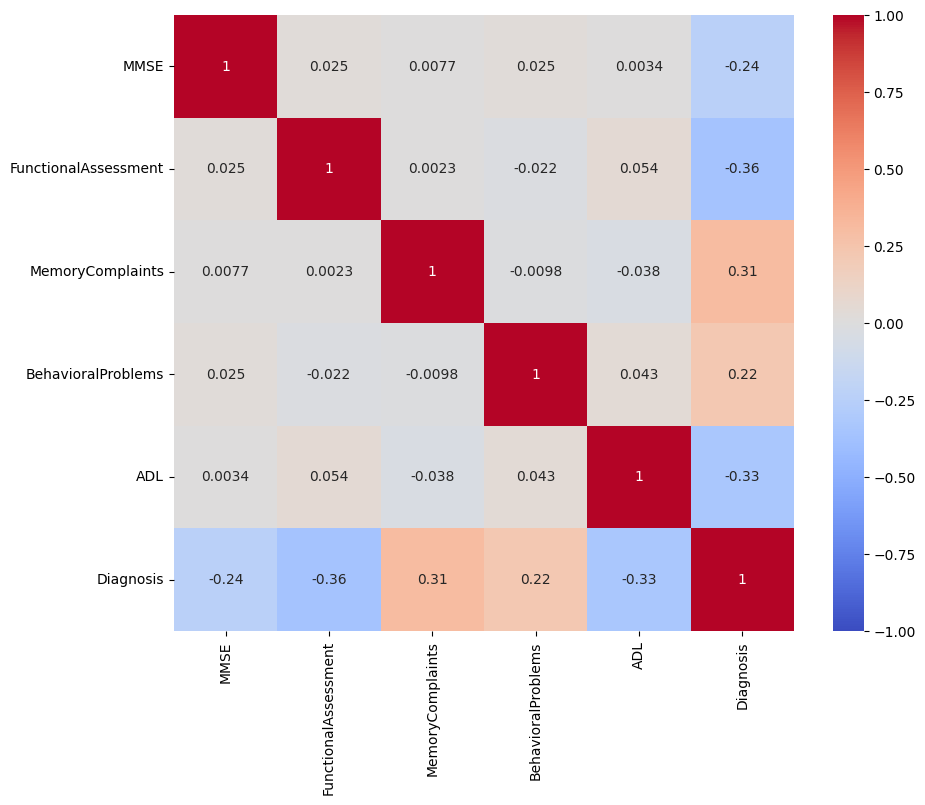

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, cmap="coolwarm");

Guardamos los datos limpios para pasar al entrenamiento

In [15]:
df.to_csv("../data/processed/datos_limpios.csv", index=False)

# Separación de datos en train y test

Importamos las librerias necesarias para este paso

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Carga de datos limpios

In [17]:
df = pd.read_csv("../data/processed/datos_limpios.csv")
df.head()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,21.463532,6.518877,0,0,1.725883,0
1,20.613267,7.118696,0,0,2.592424,0
2,7.356249,5.895077,0,0,7.119548,0
3,13.991127,8.965106,0,1,6.481226,0
4,13.517609,6.045039,0,0,0.014691,0


## Definir X, y, train y test

In [18]:
X = df.drop(["Diagnosis"], axis=1)
y = df["Diagnosis"]

Miramos como quedan distribuidas las partes

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1719, 5)
(1719,)
(430, 5)
(430,)


## Guardado de datos en 2 .csv diferentes, train y test

In [20]:
train = pd.merge(X_train, y_train, left_index=True, right_index=True)
test = pd.merge(X_test, y_test, left_index=True, right_index=True)

In [21]:
train.to_csv("../data/train/train.csv", index=False)
test.to_csv("../data/test/test.csv", index=False)

# Entrenamiento de modelos

Importamos las librerías necesarias para este punto

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_auc_score
import pickle

## Entrenamiento con Logistic Regression

### Cargamos los datos de train y de test

In [23]:
df = pd.read_csv("../data/train/train.csv")
df_test = pd.read_csv("../data/test/test.csv")

#### Separamos en X e y

In [24]:
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

Prueba de Logistic Regression

In [25]:
# Hacemos un modelo Logistic Regression con un max_iter de 5000 y comprobamos los resultados que nos da

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train) # Se entrena con X e y de la parte train

pred = lr.predict(X_test) # Se predice con X_test
scores = lr.predict_proba(X_test)[:,1]

print("TEST")
print("Recall:", recall_score(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred))    # Métricas con test
print("AUC:", roc_auc_score(y_test, scores))
print("CM:", confusion_matrix(y_test, pred))
print("Report:", classification_report(y_test, pred))

print("________________")

pred_train = lr.predict(X_train) # Se predice con X_train para comparar
scores_train = lr.predict_proba(X_train)[:,1]

print("TRAIN")
print("Recall:", recall_score(y_train, pred_train))
print("Accuracy:", accuracy_score(y_train, pred_train))    # Métricas con train
print("AUC:", roc_auc_score(y_train, scores_train))
print("CM:", confusion_matrix(y_train, pred_train))
print("Report:", classification_report(y_train, pred_train))

TEST
Recall: 0.7597402597402597
Accuracy: 0.8418604651162791
AUC: 0.9195134575569358
CM: [[245  31]
 [ 37 117]]
Report:               precision    recall  f1-score   support

           0       0.87      0.89      0.88       276
           1       0.79      0.76      0.77       154

    accuracy                           0.84       430
   macro avg       0.83      0.82      0.83       430
weighted avg       0.84      0.84      0.84       430

________________
TRAIN
Recall: 0.740924092409241
Accuracy: 0.8464223385689355
AUC: 0.9003955651629851
CM: [[1006  107]
 [ 157  449]]
Report:               precision    recall  f1-score   support

           0       0.87      0.90      0.88      1113
           1       0.81      0.74      0.77       606

    accuracy                           0.85      1719
   macro avg       0.84      0.82      0.83      1719
weighted avg       0.84      0.85      0.84      1719



Resultados: dsdfasf

Mapa de calor para tener ambas predicciones juntas de una manera más visual.

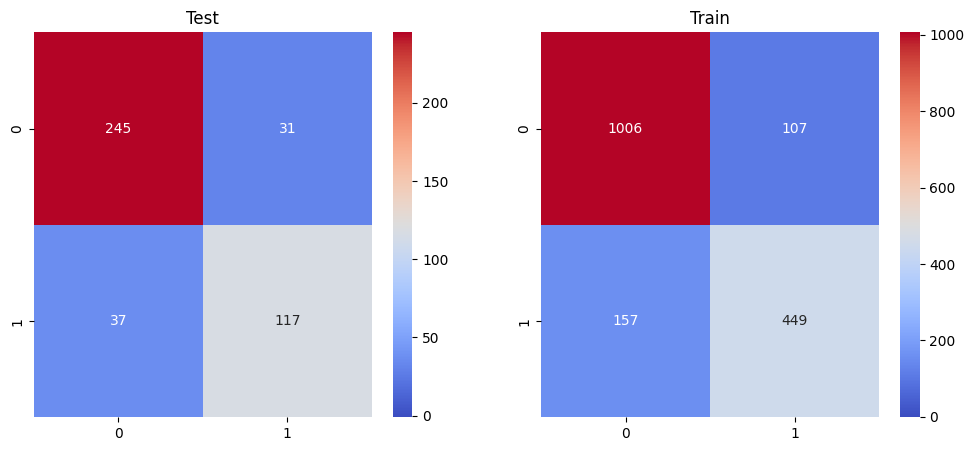

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, pred), annot=True, vmin=-1, cmap="coolwarm", fmt="d")
plt.title("Test")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_train, pred_train), annot=True, vmin=-1, cmap="coolwarm", fmt="d")
plt.title("Train");

Guardado del modelo con pickle.

In [27]:
pickle.dump(lr, open("../models/modelos_probados/01_modelo_lr.pkl", "wb"))

## Entrenamiento con Decision Tree

Importamos las librerías necesarias para llevarlo a cabo

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import pickle

### Carga de datos train

In [29]:
df = pd.read_csv("../data/train/train.csv")
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

Modelo DecisionTreeClassifier:  
- Random state: 11  
- Parámetros para el GridSearch:  
    - max_depth: [2,3,4]

In [30]:
dt = DecisionTreeClassifier(random_state=11)
parametros= {"max_depth": [2, 3, 4]}

gs_dt = GridSearchCV(estimator=dt, param_grid=parametros, scoring="recall", cv=3, verbose=3, n_jobs=-1)
gs_dt.fit(X_train,y_train)

print("Mejor estimator:", gs_dt.best_estimator_) # mejor combinación de DecisionTree
print("Mejor parametro:", gs_dt.best_params_) # mejores parámetros despues del GS
print("Mejor recall:", gs_dt.best_score_) # mejor recall después del GS

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejor estimator: DecisionTreeClassifier(max_depth=4, random_state=11)
Mejor parametro: {'max_depth': 4}
Mejor recall: 0.8547854785478548


### Carga de datos test para comprobar métricas 

In [31]:
df_test = pd.read_csv("../data/test/test.csv")
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

Procedemos a:  
- Entrenamiento con la parte train de datos y el best_estimator_
- Predicción de datos test
- guardado en variable scores el predict_proba del best_estimator para poder ver el AUC
- Resultado de la recall
- Resultado de accuracy
- Resultado de roc_auc
- Resultafo de la matriz de confusión
- Vemos el reporte completo

In [32]:
pred_dt = gs_dt.best_estimator_.predict(X_test)
scores = gs_dt.best_estimator_.predict_proba(X_test)[:,1]

print("Recall:", recall_score(y_test, pred_dt))
print("Accuracy:", accuracy_score(y_test, pred_dt))
print("AUC:", roc_auc_score(y_test, scores))
print("CM:", confusion_matrix(y_test, pred_dt))
print("Report:", classification_report(y_test, pred_dt))

Recall: 0.8961038961038961
Accuracy: 0.9302325581395349
AUC: 0.9484872012045925
CM: [[262  14]
 [ 16 138]]
Report:               precision    recall  f1-score   support

           0       0.94      0.95      0.95       276
           1       0.91      0.90      0.90       154

    accuracy                           0.93       430
   macro avg       0.93      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430



Mostramos un mapa de calor con la matriz de consufión para mejor visualización de la misma

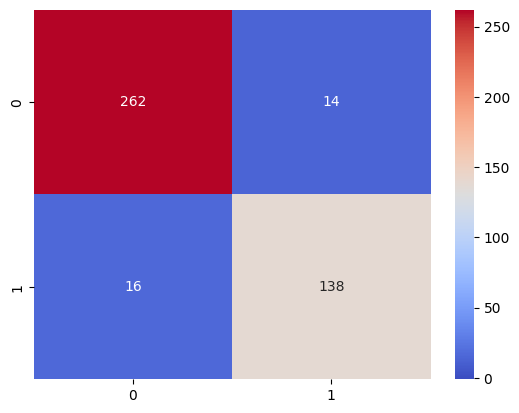

In [33]:
sns.heatmap(confusion_matrix(y_test, pred_dt), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Guardado de modelo con pickle

In [34]:
pickle.dump(gs_dt.best_estimator_, open("../models/modelos_probados/02_modelo_dt.pkl", "wb"))

## Entrenamiento con SVC

Importamos las librerías necesarias para el proceso

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_auc_score
from sklearn.svm import SVC
import pickle

### Carga de datos train

In [36]:
df = pd.read_csv("../data/train/train.csv")
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

Modelo SVC:  
- Random state: 11
- Probability: True  
- Parámetros:  
    - C: [3,5,7,9]
    - kernel: [linear, poly, rbf]
    - degree: [2,3,4]

In [37]:
svc = SVC(random_state=11, probability=True)
parametros = {"C":[3,5,7,9], "kernel": ["linear","poly", "rbf"], "degree": [2,3,4]}

gs_svc = GridSearchCV(estimator=svc, param_grid=parametros, scoring="recall", cv=3, verbose=3, n_jobs=-1)
gs_svc.fit(X_train,y_train)

print("Mejor estimator:", gs_svc.best_estimator_)
print("Mejor parametro:", gs_svc.best_params_)
print("Mejor recall:", gs_svc.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejor estimator: SVC(C=9, degree=4, kernel='poly', probability=True, random_state=11)
Mejor parametro: {'C': 9, 'degree': 4, 'kernel': 'poly'}
Mejor recall: 0.7821782178217823


### Carga de datos test

In [38]:
df_test = pd.read_csv("../data/test/test.csv")
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

Procedemos a:  
- Entrenamiento con la parte train de datos y el best_estimator_
- Predicción de datos test
- guardado en variable scores el predict_proba del best_estimator para poder ver el AUC
- Resultado de la recall
- Resultado de accuracy
- Resultado de roc_auc
- Resultafo de la matriz de confusión
- Vemos el reporte completo

In [39]:
pred_svc = gs_svc.best_estimator_.predict(X_test)
scores = gs_svc.best_estimator_.predict_proba(X_test)[:,1]

print("Recall:", recall_score(y_test, pred_svc))
print("Accuracy:", accuracy_score(y_test, pred_svc))
print("AUC:", roc_auc_score(y_test, scores))
print("CM:", confusion_matrix(y_test, pred_svc))
print("Report:", classification_report(y_test, pred_svc))

Recall: 0.8961038961038961
Accuracy: 0.8302325581395349
AUC: 0.914549218897045
CM: [[219  57]
 [ 16 138]]
Report:               precision    recall  f1-score   support

           0       0.93      0.79      0.86       276
           1       0.71      0.90      0.79       154

    accuracy                           0.83       430
   macro avg       0.82      0.84      0.82       430
weighted avg       0.85      0.83      0.83       430



Visualización de la matriz de confusión en un mapa de calor para su mejor comprensión

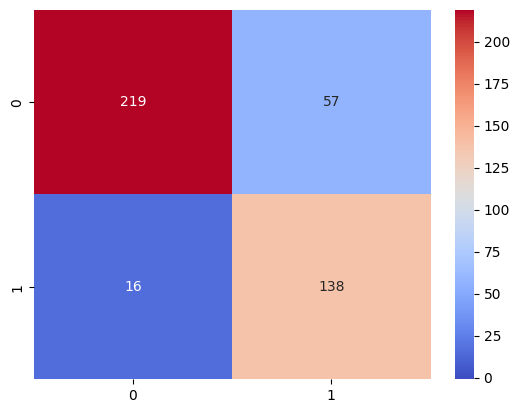

In [40]:
sns.heatmap(confusion_matrix(y_test, pred_svc), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Guardamos el modelo con pickle

In [41]:
pickle.dump(gs_svc.best_estimator_, open("../models/modelos_probados/03_modelo_svc.pkl", "wb"))

## Entrenamiento con Ada Boost

Importamos las librerías necesarias para el proceso

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
import pickle

### Carga de datos train

In [43]:
df = pd.read_csv("../data/train/train.csv")
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

Modelo AdaBoost:  
- Random state: 11  
- Parámetros:  
    - n_estimators: [100, 200, 400, 600, 800]  
    - learning_rate: [0.3, 0.5, 0.6, 0.8]

In [44]:
ada = AdaBoostClassifier(random_state=11)
parametros = {"n_estimators": [100, 200, 400, 600, 800], "learning_rate": [0.3, 0.5, 0.6, 0.8]}

gs_ada = GridSearchCV(estimator=ada, param_grid=parametros, scoring="recall", cv=3, verbose=3, n_jobs=-1)
gs_ada.fit(X_train, y_train)

print("Mejor estimator:", gs_ada.best_estimator_)
print("Mejor parametro:", gs_ada.best_params_)
print("Mejor recall:", gs_ada.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejor estimator: AdaBoostClassifier(learning_rate=0.3, n_estimators=400, random_state=11)
Mejor parametro: {'learning_rate': 0.3, 'n_estimators': 400}
Mejor recall: 0.9026402640264027


### Carga de datos test

In [45]:
df_test = pd.read_csv("../data/test/test.csv")
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

Procedemos a:  
- Entrenamiento con la parte train de datos y el best_estimator_
- Predicción de datos test
- guardado en variable scores el predict_proba del best_estimator para poder ver el AUC
- Resultado de la recall
- Resultado de accuracy
- Resultado de roc_auc
- Resultafo de la matriz de confusión
- Vemos el reporte completo

In [46]:
pred_ada = gs_ada.best_estimator_.predict(X_test) 
scores = gs_ada.best_estimator_.predict_proba(X_test)[:,1] 

print("Recall:", recall_score(y_test, pred_ada))
print("Accuracy:", accuracy_score(y_test, pred_ada))
print("AUC:", roc_auc_score(y_test, scores))
print("CM:", confusion_matrix(y_test, pred_ada))
print("Report:", classification_report(y_test, pred_ada))

Recall: 0.922077922077922
Accuracy: 0.9441860465116279
AUC: 0.9630623000188218
CM: [[264  12]
 [ 12 142]]
Report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96       276
           1       0.92      0.92      0.92       154

    accuracy                           0.94       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.94      0.94      0.94       430



Visualización de la matriz de confusión en un mapa de calor para su mejor comprensión

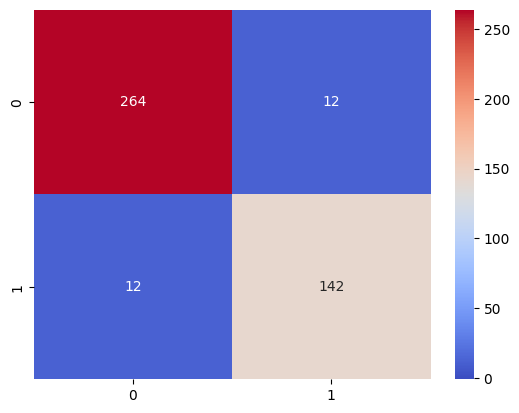

In [47]:
sns.heatmap(confusion_matrix(y_test, pred_ada), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Visualización de un Dataframe con la importancia que el modelo le da a las variables

In [48]:
df_importances_ada = pd.DataFrame({"Columna": gs_ada.best_estimator_.feature_names_in_, "Importancia": gs_ada.best_estimator_.feature_importances_})
df_importances_ada.sort_values("Importancia", ascending=False)

,Columna,Importancia
0,MMSE,0.361833
1,FunctionalAssessment,0.260846
4,ADL,0.158369
2,MemoryComplaints,0.111677
3,BehavioralProblems,0.107275


Guardado de modelo con pickle

In [49]:
pickle.dump(gs_ada.best_estimator_, open("../models/modelos_probados/04_modelo_AdaBoost.pkl", "wb"))

## Entrenamiento con Gradient Boost

Importamos las librerías necesarias para el proceso

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
import pickle

### Carga de datos train

In [51]:
df = pd.read_csv("../data/train/train.csv")
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

Modelo GradientBoost:  
- Random state: 11  
- Parámetros:  
    - n_estimators: [100, 200, 400, 600, 800]  
    - learning_rate: [0.3, 0.5, 0.6, 0.8]
    - max_depth: [2, 3, 4]

In [52]:
gb = GradientBoostingClassifier(random_state=11)
parametros = {"n_estimators": [100, 200, 400, 600, 800], "learning_rate": [0.3, 0.5, 0.6, 0.8], "max_depth": [2, 3, 4]}

gs_gb = GridSearchCV(estimator=gb, param_grid=parametros, scoring="recall", cv=3, verbose=3, n_jobs=-1)
gs_gb.fit(X_train, y_train)

print("Mejor estimator:", gs_gb.best_estimator_)
print("Mejor parametro:", gs_gb.best_params_)
print("Mejor recall:", gs_gb.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Mejor estimator: GradientBoostingClassifier(learning_rate=0.3, max_depth=2, random_state=11)
Mejor parametro: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 100}
Mejor recall: 0.9026402640264027


### Carga de datos test

In [53]:
df_test = pd.read_csv("../data/test/test.csv")
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

Procedemos a:  
- Entrenamiento con la parte train de datos y el best_estimator_
- Predicción de datos test
- guardado en variable scores el predict_proba del best_estimator para poder ver el AUC
- Resultado de la recall
- Resultado de accuracy
- Resultado de roc_auc
- Resultafo de la matriz de confusión
- Vemos el reporte completo

In [54]:
pred_gb = gs_gb.best_estimator_.predict(X_test)
scores = gs_gb.best_estimator_.predict_proba(X_test)[:,1]

print("Recall:", recall_score(y_test, pred_gb))
print("Accuracy:", accuracy_score(y_test, pred_gb))
print("AUC:", roc_auc_score(y_test, scores))
print("CM:", confusion_matrix(y_test, pred_gb))
print("Report:", classification_report(y_test, pred_gb))

Recall: 0.961038961038961
Accuracy: 0.9534883720930233
AUC: 0.9599214191605497
CM: [[262  14]
 [  6 148]]
Report:               precision    recall  f1-score   support

           0       0.98      0.95      0.96       276
           1       0.91      0.96      0.94       154

    accuracy                           0.95       430
   macro avg       0.95      0.96      0.95       430
weighted avg       0.95      0.95      0.95       430



Visualización de la matriz de confusión en un mapa de calor para su mejor comprensión

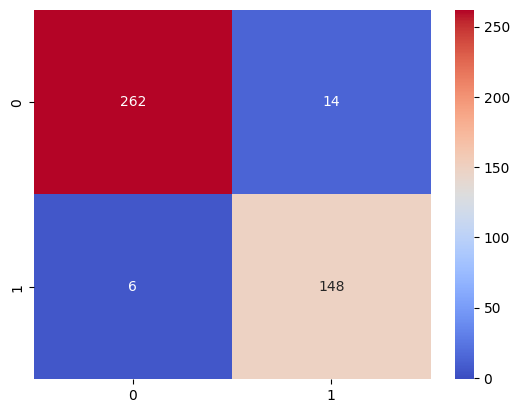

In [55]:
sns.heatmap(confusion_matrix(y_test, pred_gb), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Visualización de un Dataframe con la importancia que el modelo le da a las variables

In [56]:
df_importances_gbcl = pd.DataFrame({"Columna": gs_gb.best_estimator_.feature_names_in_, "Importancia": gs_gb.best_estimator_.feature_importances_})
df_importances_gbcl.sort_values("Importancia", ascending=False)

,Columna,Importancia
0,MMSE,0.282304
1,FunctionalAssessment,0.281813
4,ADL,0.207769
2,MemoryComplaints,0.129720
3,BehavioralProblems,0.098394


Guardado de modelo con pickle

In [57]:
pickle.dump(gs_gb.best_estimator_, open("../models/modelos_probados/05_modelo_GradientBoost.pkl", "wb"))

## Entrenamiento con Random Forest

Importamos las librerías necesarias para el proceso

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import pickle

### Carga de datos train

In [59]:
df = pd.read_csv("../data/train/train.csv")
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

Modelo Random Forest:  
- Random state: 11  
- Parámetros:  
    - n_estimators: [400, 700, 800]  
    - max_depth: [4, 5, 6]

In [60]:
rf = RandomForestClassifier(random_state=11)
parametros = {"n_estimators": [400, 700, 800], "max_depth": [4, 5, 6]}

gs_rf = GridSearchCV(estimator=rf, param_grid=parametros, scoring="recall", cv=3, verbose=3, n_jobs=-1)
gs_rf.fit(X_train, y_train)

print("Mejor estimator:", gs_rf.best_estimator_)
print("Mejor parametro:", gs_rf.best_params_)
print("Mejor recall:", gs_rf.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor estimator: RandomForestClassifier(max_depth=6, n_estimators=700, random_state=11)
Mejor parametro: {'max_depth': 6, 'n_estimators': 700}
Mejor recall: 0.8976897689768978


### Carga de datos test

In [61]:
df_test = pd.read_csv("../data/test/test.csv")
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

Procedemos a:  
- Entrenamiento con la parte train de datos y el best_estimator_
- Predicción de datos test
- guardado en variable scores el predict_proba del best_estimator para poder ver el AUC
- Resultado de la recall
- Resultado de accuracy
- Resultado de roc_auc
- Resultafo de la matriz de confusión
- Vemos el reporte completo

In [62]:
pred_rf = gs_rf.best_estimator_.predict(X_test)
scores = gs_rf.best_estimator_.predict_proba(X_test)[:,1]

print("Recall:", recall_score(y_test, pred_rf))
print("Accuracy:", accuracy_score(y_test, pred_rf))
print("AUC:", roc_auc_score(y_test, scores))
print("CM:", confusion_matrix(y_test, pred_rf))
print("Report:", classification_report(y_test, pred_rf))

Recall: 0.948051948051948
Accuracy: 0.9604651162790697
AUC: 0.9670148691887823
CM: [[267   9]
 [  8 146]]
Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97       276
           1       0.94      0.95      0.94       154

    accuracy                           0.96       430
   macro avg       0.96      0.96      0.96       430
weighted avg       0.96      0.96      0.96       430



Visualización de la matriz de confusión en un mapa de calor y gráfico de barras para su mejor comprensión

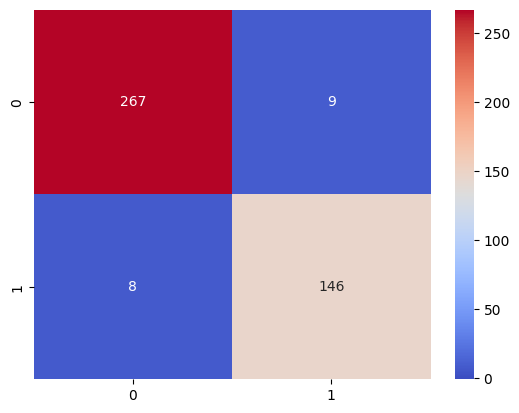

In [63]:
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, vmin=-1, cmap="coolwarm", fmt='d');

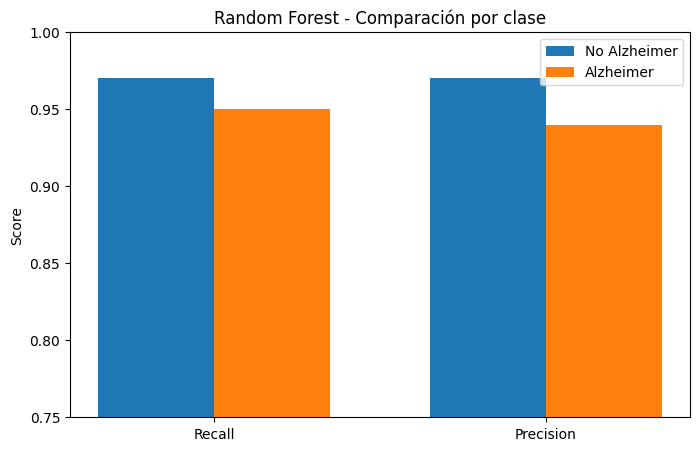

In [90]:
labels = ["Recall", "Precision"]
clase_0 = [0.97, 0.97]
clase_1 = [0.95, 0.94]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, clase_0, width, label="No Alzheimer")
plt.bar(x + width/2, clase_1, width, label="Alzheimer")

plt.xticks(x, labels)
plt.ylim(0.75, 1.0)
plt.ylabel("Score")
plt.title("Random Forest - Comparación por clase")
plt.legend();

Visualización de un Dataframe con la importancia que el modelo le da a las variables

In [64]:
df_importances_rf = pd.DataFrame({"Columna": gs_rf.best_estimator_.feature_names_in_, "Importancia": gs_rf.best_estimator_.feature_importances_})
df_importances_rf.sort_values("Importancia", ascending=False)

,Columna,Importancia
1,FunctionalAssessment,0.293341
4,ADL,0.243535
0,MMSE,0.218259
2,MemoryComplaints,0.143388
3,BehavioralProblems,0.101476


Guardado de modelo con pickle

In [65]:
pickle.dump(gs_rf.best_estimator_, open("../models/modelo_final/06_modelo_RandomForest.pkl", "wb"))

## Entrenamiento con Kmeans

Importamos las librerías necesarias para el proceso

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.cluster import KMeans

### Carga de datos train

In [67]:
df = pd.read_csv("../data/train/train.csv")
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

### Carga de datos test

In [68]:
df_test = pd.read_csv("../data/test/test.csv")
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

Modelo KMeans:  
- Random state: 11  
- n_clusters: 6 

In [69]:
kmeans = KMeans(n_clusters=6, random_state=11)
kmeans.fit(X_train)
X_train_km = kmeans.transform(X_train)
X_test_km = kmeans.transform(X_test)

Entrenamos el modelo con la parte train y transformamos los datos de X_train y X_test

Guardado de modelo con pickle

In [70]:
pickle.dump(kmeans, open("../models/modelos_probados/07_modelo_kmeans.pkl", "wb"))

Modelo Random Forest con datos entrenados con KMeans:  
- Random state: 11  
- n_estimators: 700  
- class_weight: balanced

Pasamos al modelo los datos previamente entrenados con KMeans

In [71]:
rf_km = RandomForestClassifier(n_estimators=700, class_weight="balanced", random_state=11)
rf_km.fit(X_train_km, y_train)

pred_rfkm = rf_km.predict(X_test_km)
pred_rfkm2 = rf_km.predict_proba(X_test_km)[:,1]
print("Recall:", recall_score(y_test, pred_rfkm))
print("Accuracy:", accuracy_score(y_test, pred_rfkm))
print("AUC:", roc_auc_score(y_test, pred_rfkm2))
print("CM:", confusion_matrix(y_test, pred_rfkm))

Recall: 0.6428571428571429
Accuracy: 0.7953488372093023
AUC: 0.8651891586674195
CM: [[243  33]
 [ 55  99]]


Visualización de la matriz de confusión en un mapa de calor para su mejor comprensión

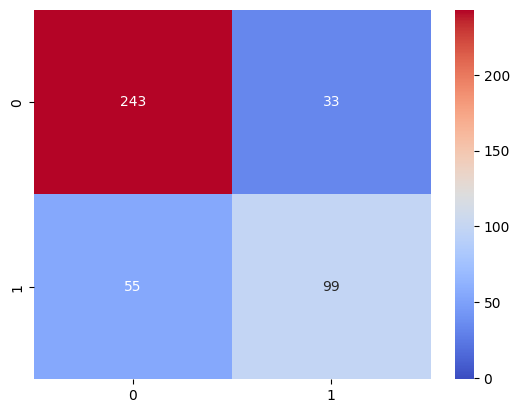

In [72]:
sns.heatmap(confusion_matrix(y_test, pred_rfkm), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Modelo Logistic Regression con datos entrenados con KMeans:  
- max_iter: 5000  
- class_weight: balanced

Pasamos al modelo los datos previamente entrenados con KMeans

In [73]:
lr_km = LogisticRegression(max_iter=5000, class_weight="balanced")
lr_km.fit(X_train_km, y_train)

pred_km = lr_km.predict(X_test_km)
pred_km2 = lr_km.predict_proba(X_test_km)[:,1]
print("Recall:", recall_score(y_test, pred_km))
print("Accuracy:", accuracy_score(y_test, pred_km))
print("AUC:", roc_auc_score(y_test, pred_km2))
print("CM:", confusion_matrix(y_test, pred_km))

Recall: 0.7597402597402597
Accuracy: 0.7767441860465116
AUC: 0.8530491247882552
CM: [[217  59]
 [ 37 117]]


Visualización de la matriz de confusión en un mapa de calor para su mejor comprensión

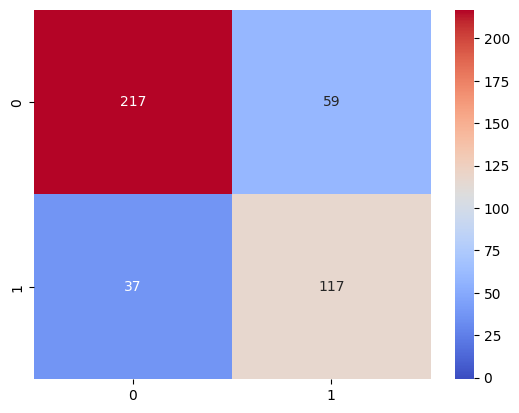

In [74]:
sns.heatmap(confusion_matrix(y_test, pred_km), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Se probó añadir un componente no supervisado (K-Means con k=6) como variable adicional. Sin embargo, el rendimiento del modelo Random Forest empeoró notablemente: el recall bajó a 0.64 y la accuracy a 0.79. EL modelo Logistic Regression, también empeoró: el recall bajó a 0.76 y la accuracy a 0.77. Esto sugiere que los clusters generados no capturan patrones relacionados con la variable objetivo. Por lo tanto, se decidió descartar esta característica en el modelo final.

## Entrenamiento con modelo de Red Neuronal

Importamos las librerías necesarias para el proceso

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.preprocessing import StandardScaler
import pickle
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

### Carga de datos train

In [76]:
df = pd.read_csv("../data/train/train.csv")
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

Escalamos y transformamos los datos de train

In [77]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)

Modelo Sequential con datos escalados:  
- capas: 
    - capa Flatten con un input de de 5 (variables que pasamos al modelo)
    - capa Dense con 3 units y activación relu  
    - capa Dense (capa final) con 1 unidad de salida y activación sigmoid al ser clasificación binaria
- compile: 
    - optimizer: adam con learning_rate de 0.01  
    - loss: elegimos Binary Crossentropy  
    - métricas: elegimos recall
- entrenamiento de modelo con datos escadalos y una validation_split de 0.10

In [78]:
capas = [
    keras.layers.Flatten(input_dim=(5)),
    keras.layers.Dense(units = 3, activation='relu'),
    keras.layers.Dense(units = 1, activation='sigmoid'),]

model = keras.models.Sequential(capas)

model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.01),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.Recall()])

model.fit(X_train_st, y_train, batch_size = 100, epochs = 30, validation_split = 0.10)

c:\Users\Rebeca\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.6517 - recall: 0.8885 - val_loss: 0.6316 - val_recall: 0.8644
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5917 - recall: 0.8282 - val_loss: 0.5723 - val_recall: 0.7966
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5216 - recall: 0.7697 - val_loss: 0.5021 - val_recall: 0.7797
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4486 - recall: 0.7660 - val_loss: 0.4511 - val_recall: 0.7627
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4002 - recall: 0.7605 - val_loss: 0.4244 - val_recall: 0.7458
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3782 - recall: 0.7550 - val_loss: 0.4176 - val_recall: 0.7288
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3686 - recall: 0.7623 - val_loss: 0.4174 - val_recall: 0.7288
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3638 - recall: 0.7459 - val_loss: 0.4149 - val_recall: 0.7288
Epoch 9/30
16/16 ━━━━━

### Carga de datos test

In [79]:
df_test = pd.read_csv("../data/test/test.csv")
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

Transformamos los datos de test con el escalado que hemos hecho antes

In [80]:
X_test_st = scaler.transform(X_test)

Evaluamos el modelo con test

In [81]:
evaluacion = model.evaluate(X_test_st, y_test)
evaluacion

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3356 - recall: 0.7987 


[0.33563271164894104, 0.798701286315918]

Predecimos los datos de test

In [82]:
pred = model.predict(X_test_st).round(0)
pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],

Procedemos a:  
- Resultado de la recall
- Resultado de accuracy
- Resultafo de la matriz de confusión
- Vemos el reporte completo

In [83]:
print("Recall:", recall_score(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred))
print("CM:", confusion_matrix(y_test, pred))
print("Report:", classification_report(y_test, pred))

Recall: 0.7987012987012987
Accuracy: 0.8651162790697674
CM: [[249  27]
 [ 31 123]]
Report:               precision    recall  f1-score   support

           0       0.89      0.90      0.90       276
           1       0.82      0.80      0.81       154

    accuracy                           0.87       430
   macro avg       0.85      0.85      0.85       430
weighted avg       0.86      0.87      0.86       430



Visualización de la matriz de confusión en un mapa de calor para su mejor comprensión

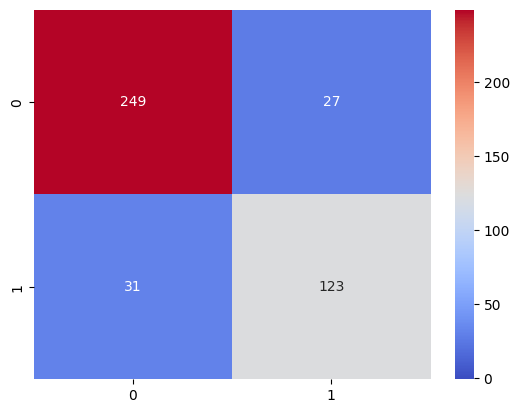

In [84]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Guardado de modelo de escalado con pickle y el modelo sequential con keras

In [85]:
pickle.dump(scaler, open("../models/modelos_probados/08_scaler.pkl", "wb"))
model.save("../models/modelos_probados/08_model_sequencial.keras")

# Conclusiones

Primero: criterio correcto para Alzheimer:

- En diagnóstico médico, el criterio principal suele ser:

    - Recall de la clase positiva (Alzheimer = 1)
        → minimizar falsos negativos (personas con Alzheimer no detectadas)

Segundo: Modelos descartados:

- KMeans + supervisado:

    - Recall muy bajo
    - Peor AUC
    - Añade complejidad sin mejora


- Red neuronal:

    - Resultados similares a Logistic
    - Mucha más complejidad
    - Menor interpretabilidad


- Logistic Regression:

    - Muy buen baseline
    - Excelente AUC
    - Pero recall claramente inferior a los modelos ensemble


- Decision Tree y SVC:

    - Buen recall
    - Pero:
        - Árbol → inestable, overfitting
        - SVC → peor accuracy y AUC


Los 3 modelos realmente candidatos:

- AdaBoost:

    - Recall alto (0.922)
    - AUC muy alto (0.963)
    - Buen equilibrio
    - Menos overfitting que un árbol solo

- Gradient Boosting:

    - Recall más alto de todos (0.961)
    - Accuracy muy alta
    - Solo 6 falsos negativos ← excelente para medicina

- Random Forest (GANADOR GLOBAL)
Por qué es elegido como modelo final:

    - Recall muy alto: 0.948
    - Mejor AUC: 0.967
    - Mejor accuracy global
    - Muy pocos falsos negativos (8)
    - Más robusto y estable que Gradient Boost
    - Excelente generalización
    - CM: FN = 8, FP = 9

Visualizamos los resultados de los 3 mejores modelos:

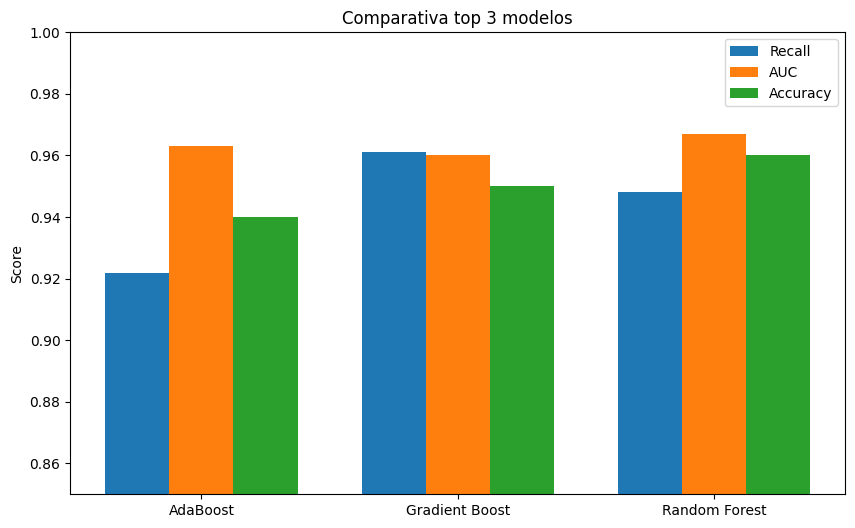

In [86]:
modelos = ["AdaBoost", "Gradient Boost", "Random Forest"]
recall = [0.922, 0.961, 0.948]
auc = [0.963, 0.960, 0.967]
accuracy = [0.94, 0.95, 0.96]

x = np.arange(len(modelos))
width = 0.25

plt.figure(figsize=(10, 6))

plt.bar(x - width, recall, width, label="Recall")
plt.bar(x, auc, width, label="AUC")
plt.bar(x + width, accuracy, width, label="Accuracy")

plt.xticks(x, modelos)
plt.ylim(0.85, 1.0)
plt.ylabel("Score")
plt.title("Comparativa top 3 modelos")
plt.legend();

Aunque varios modelos presentan un rendimiento muy alto, el modelo Random Forest ha sido seleccionado como modelo final, ya que ofrece el mejor equilibrio entre recall de la clase positiva (Alzheimer), AUC y estabilidad. En un contexto clínico, minimizar los falsos negativos es crucial, y el Random Forest presenta uno de los valores más bajos sin sacrificar la capacidad discriminativa global.